In [186]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

RANDOM_STATE = 1

## **Viewing the Data**

In [187]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [188]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [189]:
df.isna().sum().sort_values()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [191]:
df.duplicated().sum()

0

In [192]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [193]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [194]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

## **Dropping unnecessary columns**

In [195]:
df.drop(columns = ['RowNumber', 'CustomerId','Surname'], inplace = True)

In [196]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [197]:
df.shape

(10000, 11)

## **One-hot encoding**

In [198]:
df = pd.get_dummies(df, columns = ["Geography", "Gender"], drop_first=True, dtype=int)

In [199]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


## **Splitting the data**

In [200]:
X = df.drop(columns = ["Exited"])
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_STATE)

## **Scaling the data**

In [201]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Building the model**

In [202]:
# Sequential model

model = Sequential()

# Add 1st hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (11,)))

# Add 2st hidden layer
model.add(Dense(11, activation = 'relu'))

# Add output layer
model.add(Dense(1, activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [203]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 11)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368 (1.44 KB)

 Trainable params: 368 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [204]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',  metrics = ['accuracy'])

In [205]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7179 - loss: 0.5705 - val_accuracy: 0.7975 - val_loss: 0.4632
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4528 - val_accuracy: 0.8012 - val_loss: 0.4411
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4389 - val_accuracy: 0.8044 - val_loss: 0.4267
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.4281 - val_accuracy: 0.8081 - val_loss: 0.4174
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8131 - loss: 0.4098 - val_accuracy: 0.8150 - val_loss: 0.4089
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8140 - loss: 0.4000 - val_accuracy: 0.8125 - val_loss: 0.4001
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8206 - loss: 0.3872 - val_accuracy: 0.8200 - val_loss: 0.3900
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8276 - loss: 0.3863 - val_accu

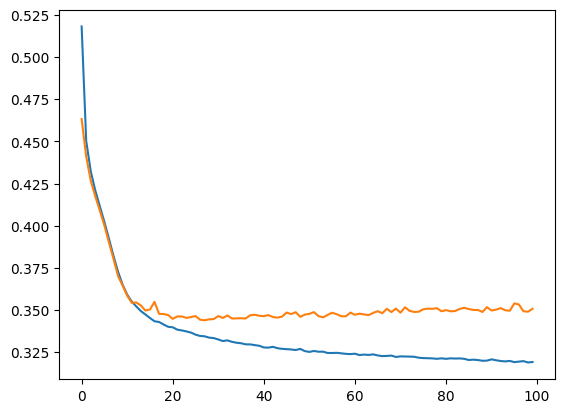

In [206]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

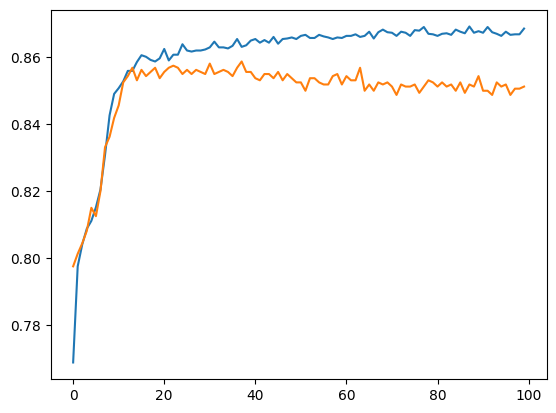

In [207]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [208]:
model.layers[2].get_weights()

[array([[ 1.7703508 ],
        [ 1.227852  ],
        [-0.6722082 ],
        [-0.30635878],
        [-0.52341694],
        [ 0.65827024],
        [-0.6633893 ],
        [ 0.9450263 ],
        [ 1.2346374 ],
        [-0.6832325 ],
        [-0.72484034]], dtype=float32),
 array([0.03128285], dtype=float32)]

In [209]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [210]:
y_pred = np.where(y_log>0.5, 1, 0)

In [211]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.8635
